In [1]:
from datetime import datetime, timedelta
from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
import pandas as pd

from dateutil.relativedelta import relativedelta

from dotenv import load_dotenv
import os

load_dotenv()


True

In [2]:
TOKEN = os.getenv("TOKEN")
end_date = datetime.now() - timedelta(days=1)
start_date = end_date - relativedelta(years=4)
SHORT_WINDOW_SIZE = 50
LONG_WINDOW_SIZE = 200
LKOH = "BBG004731032"
data_candle = []


In [3]:
with Client(TOKEN) as c:
    for candle in c.get_all_candles(
        instrument_id=LKOH,
        from_=start_date,
        to=end_date,
        interval=CandleInterval.CANDLE_INTERVAL_DAY,
        candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
    ):
        data_candle.append({
            'Date': candle.time.date(),
            'Price': candle.close.units + candle.close.nano / 1e9,
        })

df_lkoh = pd.DataFrame(data_candle)
df_lkoh.set_index('Date', inplace=True)


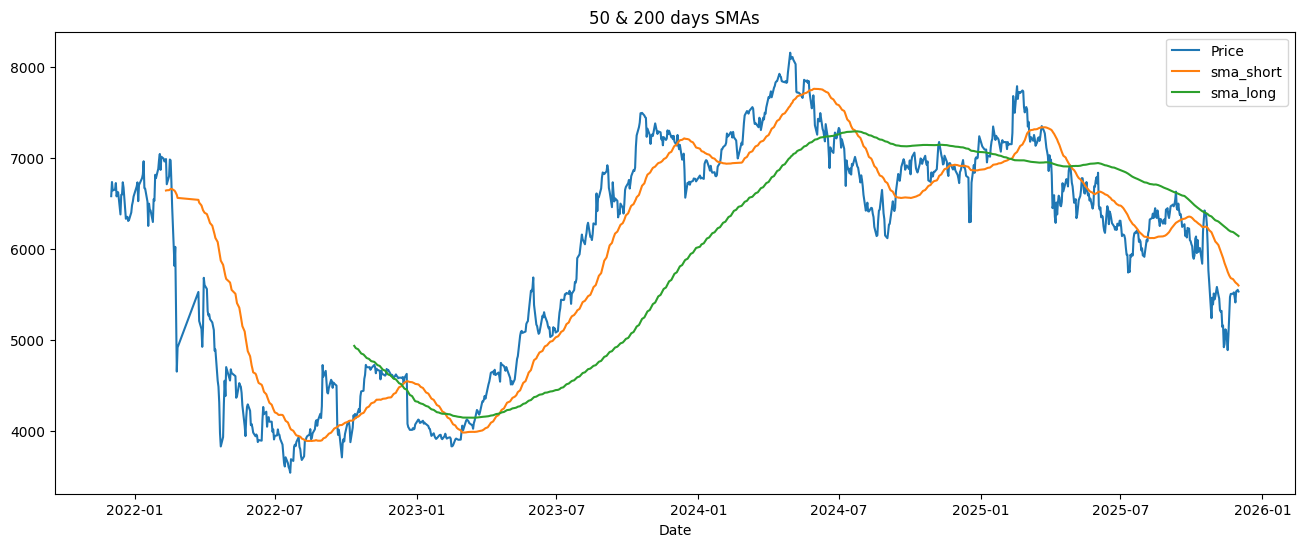

In [4]:
df_lkoh["sma_short"] = df_lkoh["Price"].rolling(SHORT_WINDOW_SIZE).mean()
df_lkoh["sma_long"] = df_lkoh["Price"].rolling(LONG_WINDOW_SIZE).mean()

df_lkoh.plot(title=f'{SHORT_WINDOW_SIZE} & {LONG_WINDOW_SIZE} days SMAs', figsize=(16, 6));